# Choice of method 

In this section, we demonstrate how to use the three implemented methods for film thickness determination on a dataset. Since these methods rely on peak detection, we begin by illustrating the peak detection process.

## Step 1: Loading Experimental Data from a `.xy` File 

Before applying any thickness analysis method, the first step is to acquire the data using a spectrometer. The spectrometer typically exports the raw spectral data in a `.xy` file format, which is essentially a plain text file containing two columns :

- The **wavelength** (in nanometers)  
- The corresponding **intensity** (in u.a)

Here is an example of the raw content in such a file using the NanoCalc 2000 VIS/NIR spectrometer :

In [1]:
from pathlib import Path

# Define the path to the folder containing your .xy file
datafile_path = Path('../../data/basic/000004310.xy')

# Read raw data (first lines)
with open(datafile_path, "r") as f:
    first_lines = f.readlines()[:5]
    for line in first_lines:
        print(line, end='')
    print('...')

399.985280,0.396825
400.329500,0.416667
400.673680,0.493333
401.017820,0.378049
401.361920,0.416667
...


Here we load files from the data provided with optifik: `data/basic/`

To load this data directly into Python, we use the function `load_spectrum` from the `optifik.io` module.

`load_spectrum` automatically reads the `.xy` file in the given folder.

You can specify `wavelength_min` and `wavelength_max` to remove irrelevant data.

The function returns:

- `wavelengths`: an array of wavelengths (in nm)  
- `intensities`: the corresponding measured intensities

The data can be ploted with the function `plot_spectrum` from the `optifik.analysis` module. Here an exemple of plot you can obtain.

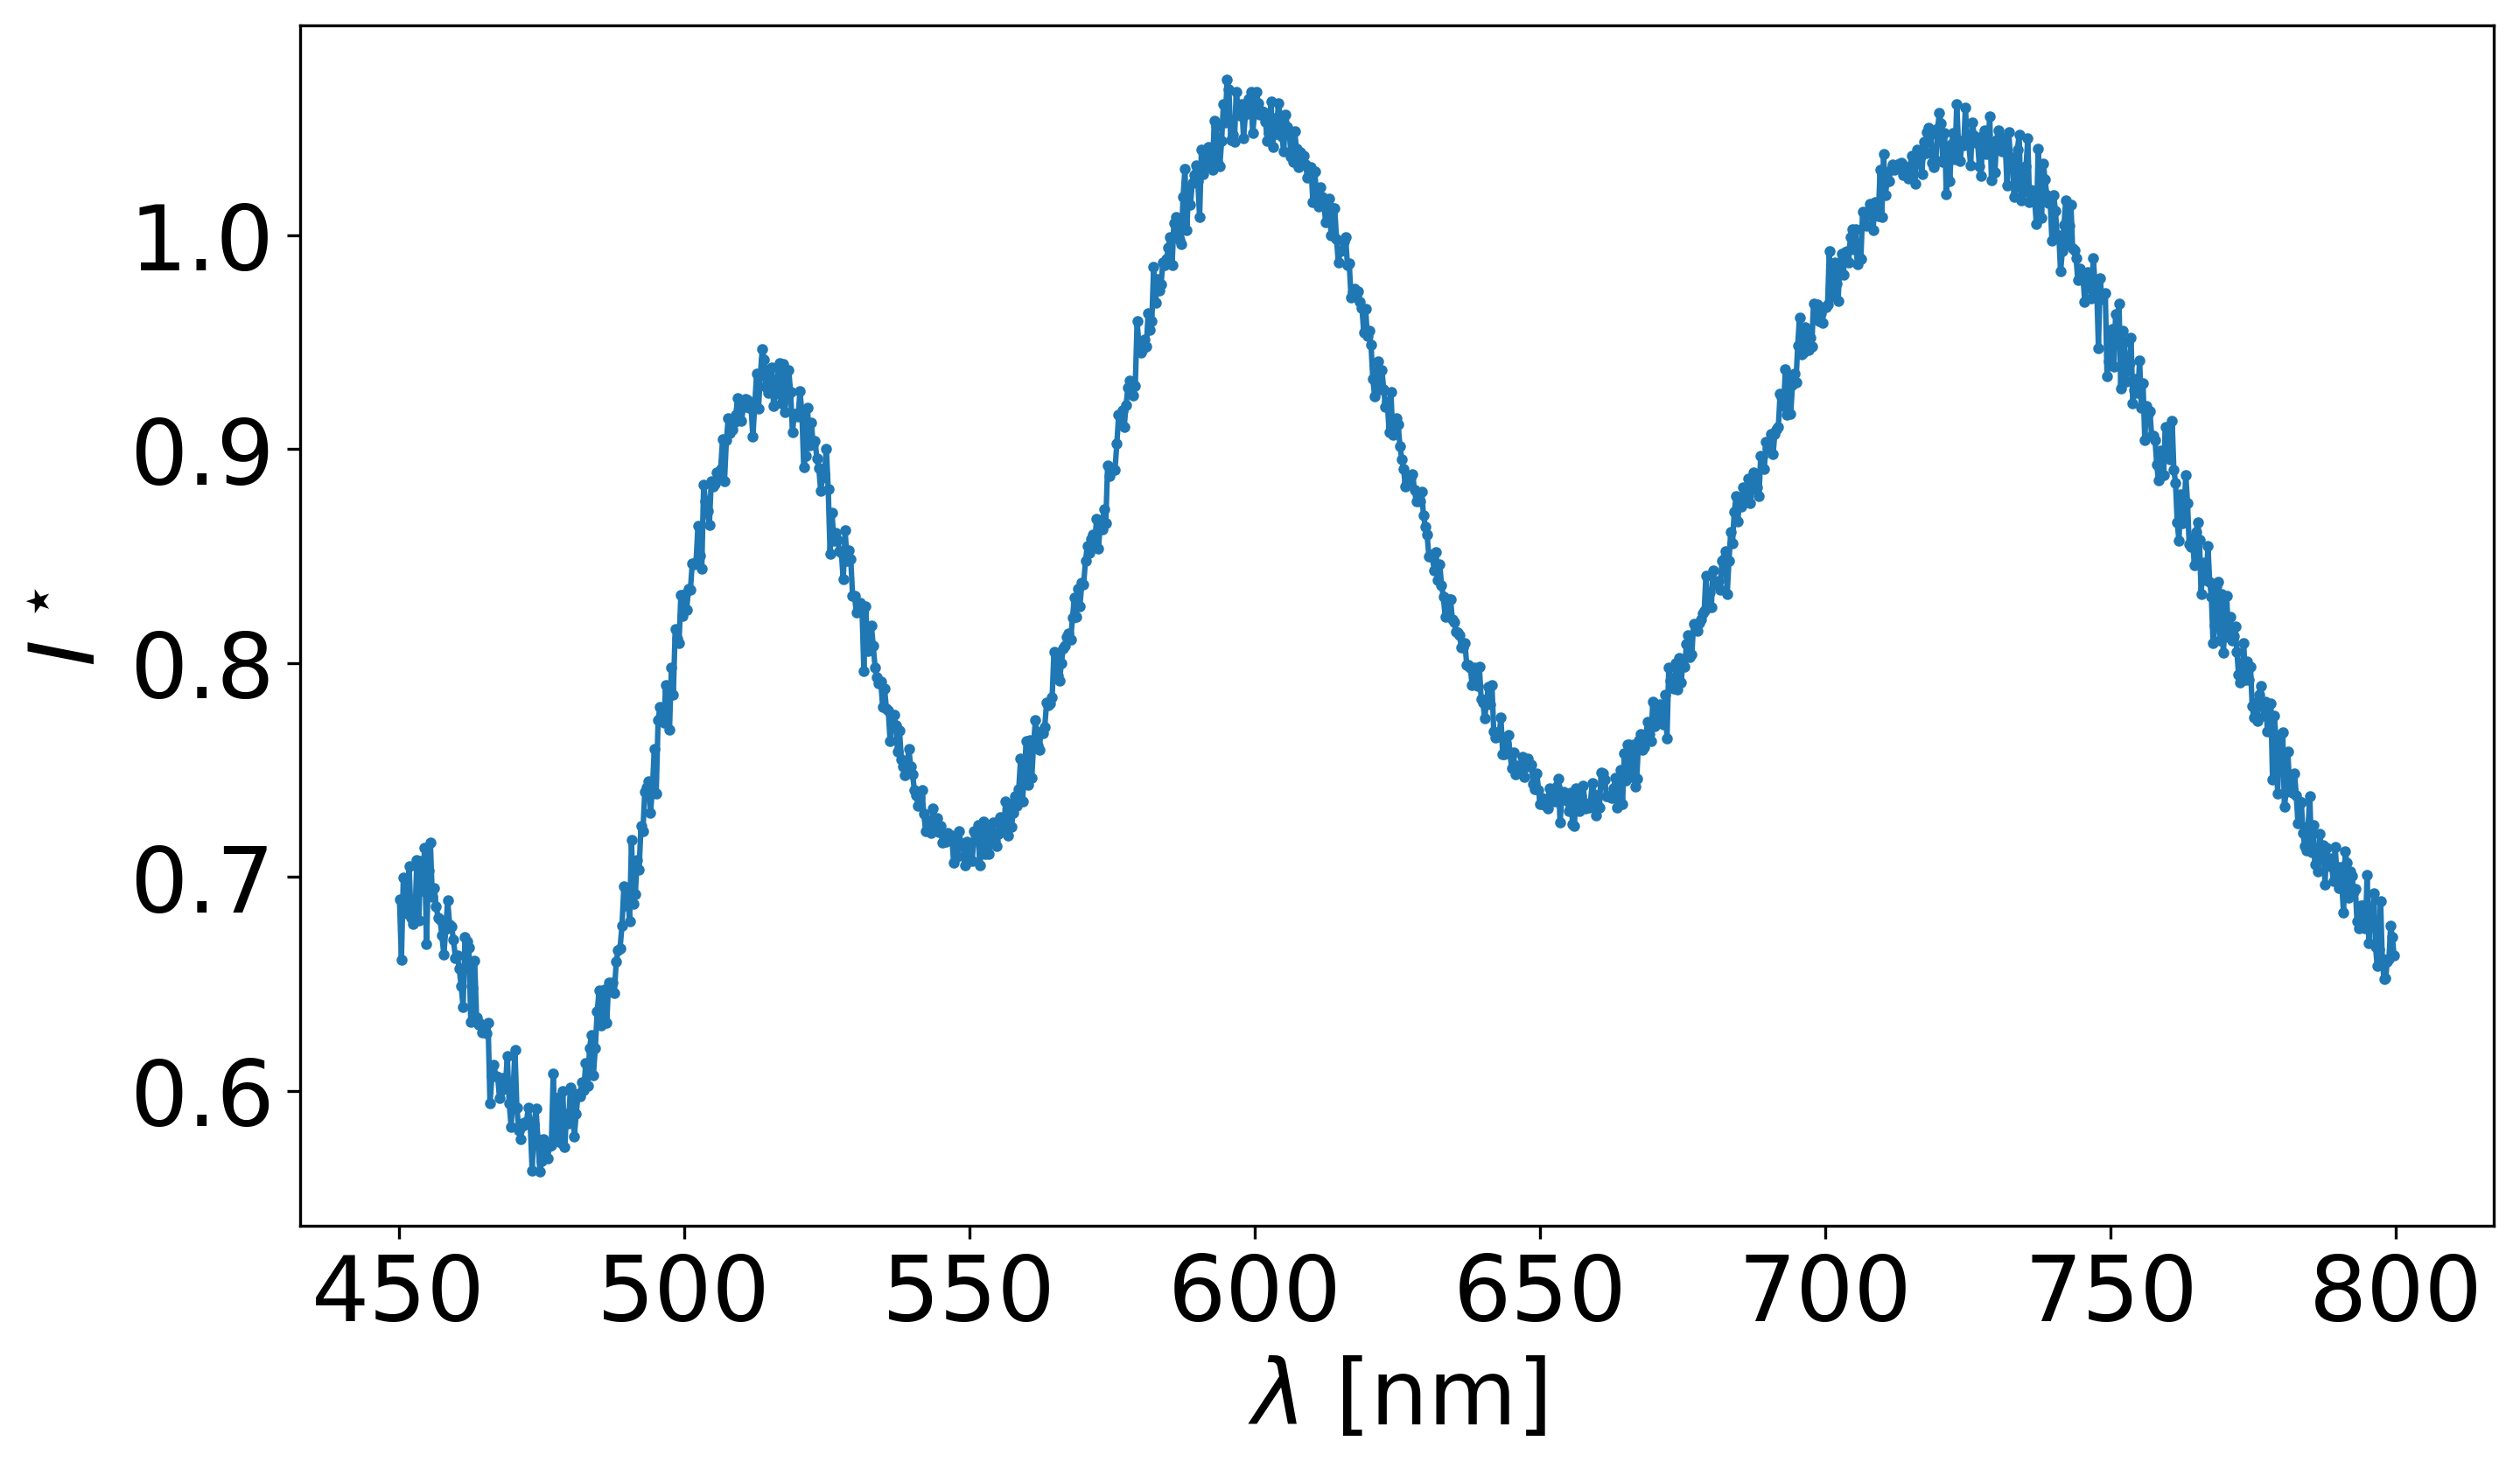

In [2]:
from optifik.io import load_spectrum
from optifik.analysis import plot_spectrum

# Load wavelengths and intensities from the file
# Comma separated values by default
# but options are available to read alternative text formats.
wavelengths, intensities = load_spectrum(datafile_path, 
                                         wavelength_min=450, 
                                         wavelength_max=800)

# Intensity as a function of wavelength
plot_spectrum(wavelengths, intensities)

## Step 2: Data Smoothing

Once this data is loaded, you can apply a Savitsky-Golay filter of order 3 and a window of 11 points to smooth the data. We use the function `smooth_intensities` from the `optifik.analysis` module. Here an exemple of plot you can obtain with the function `plot_spectrum`.

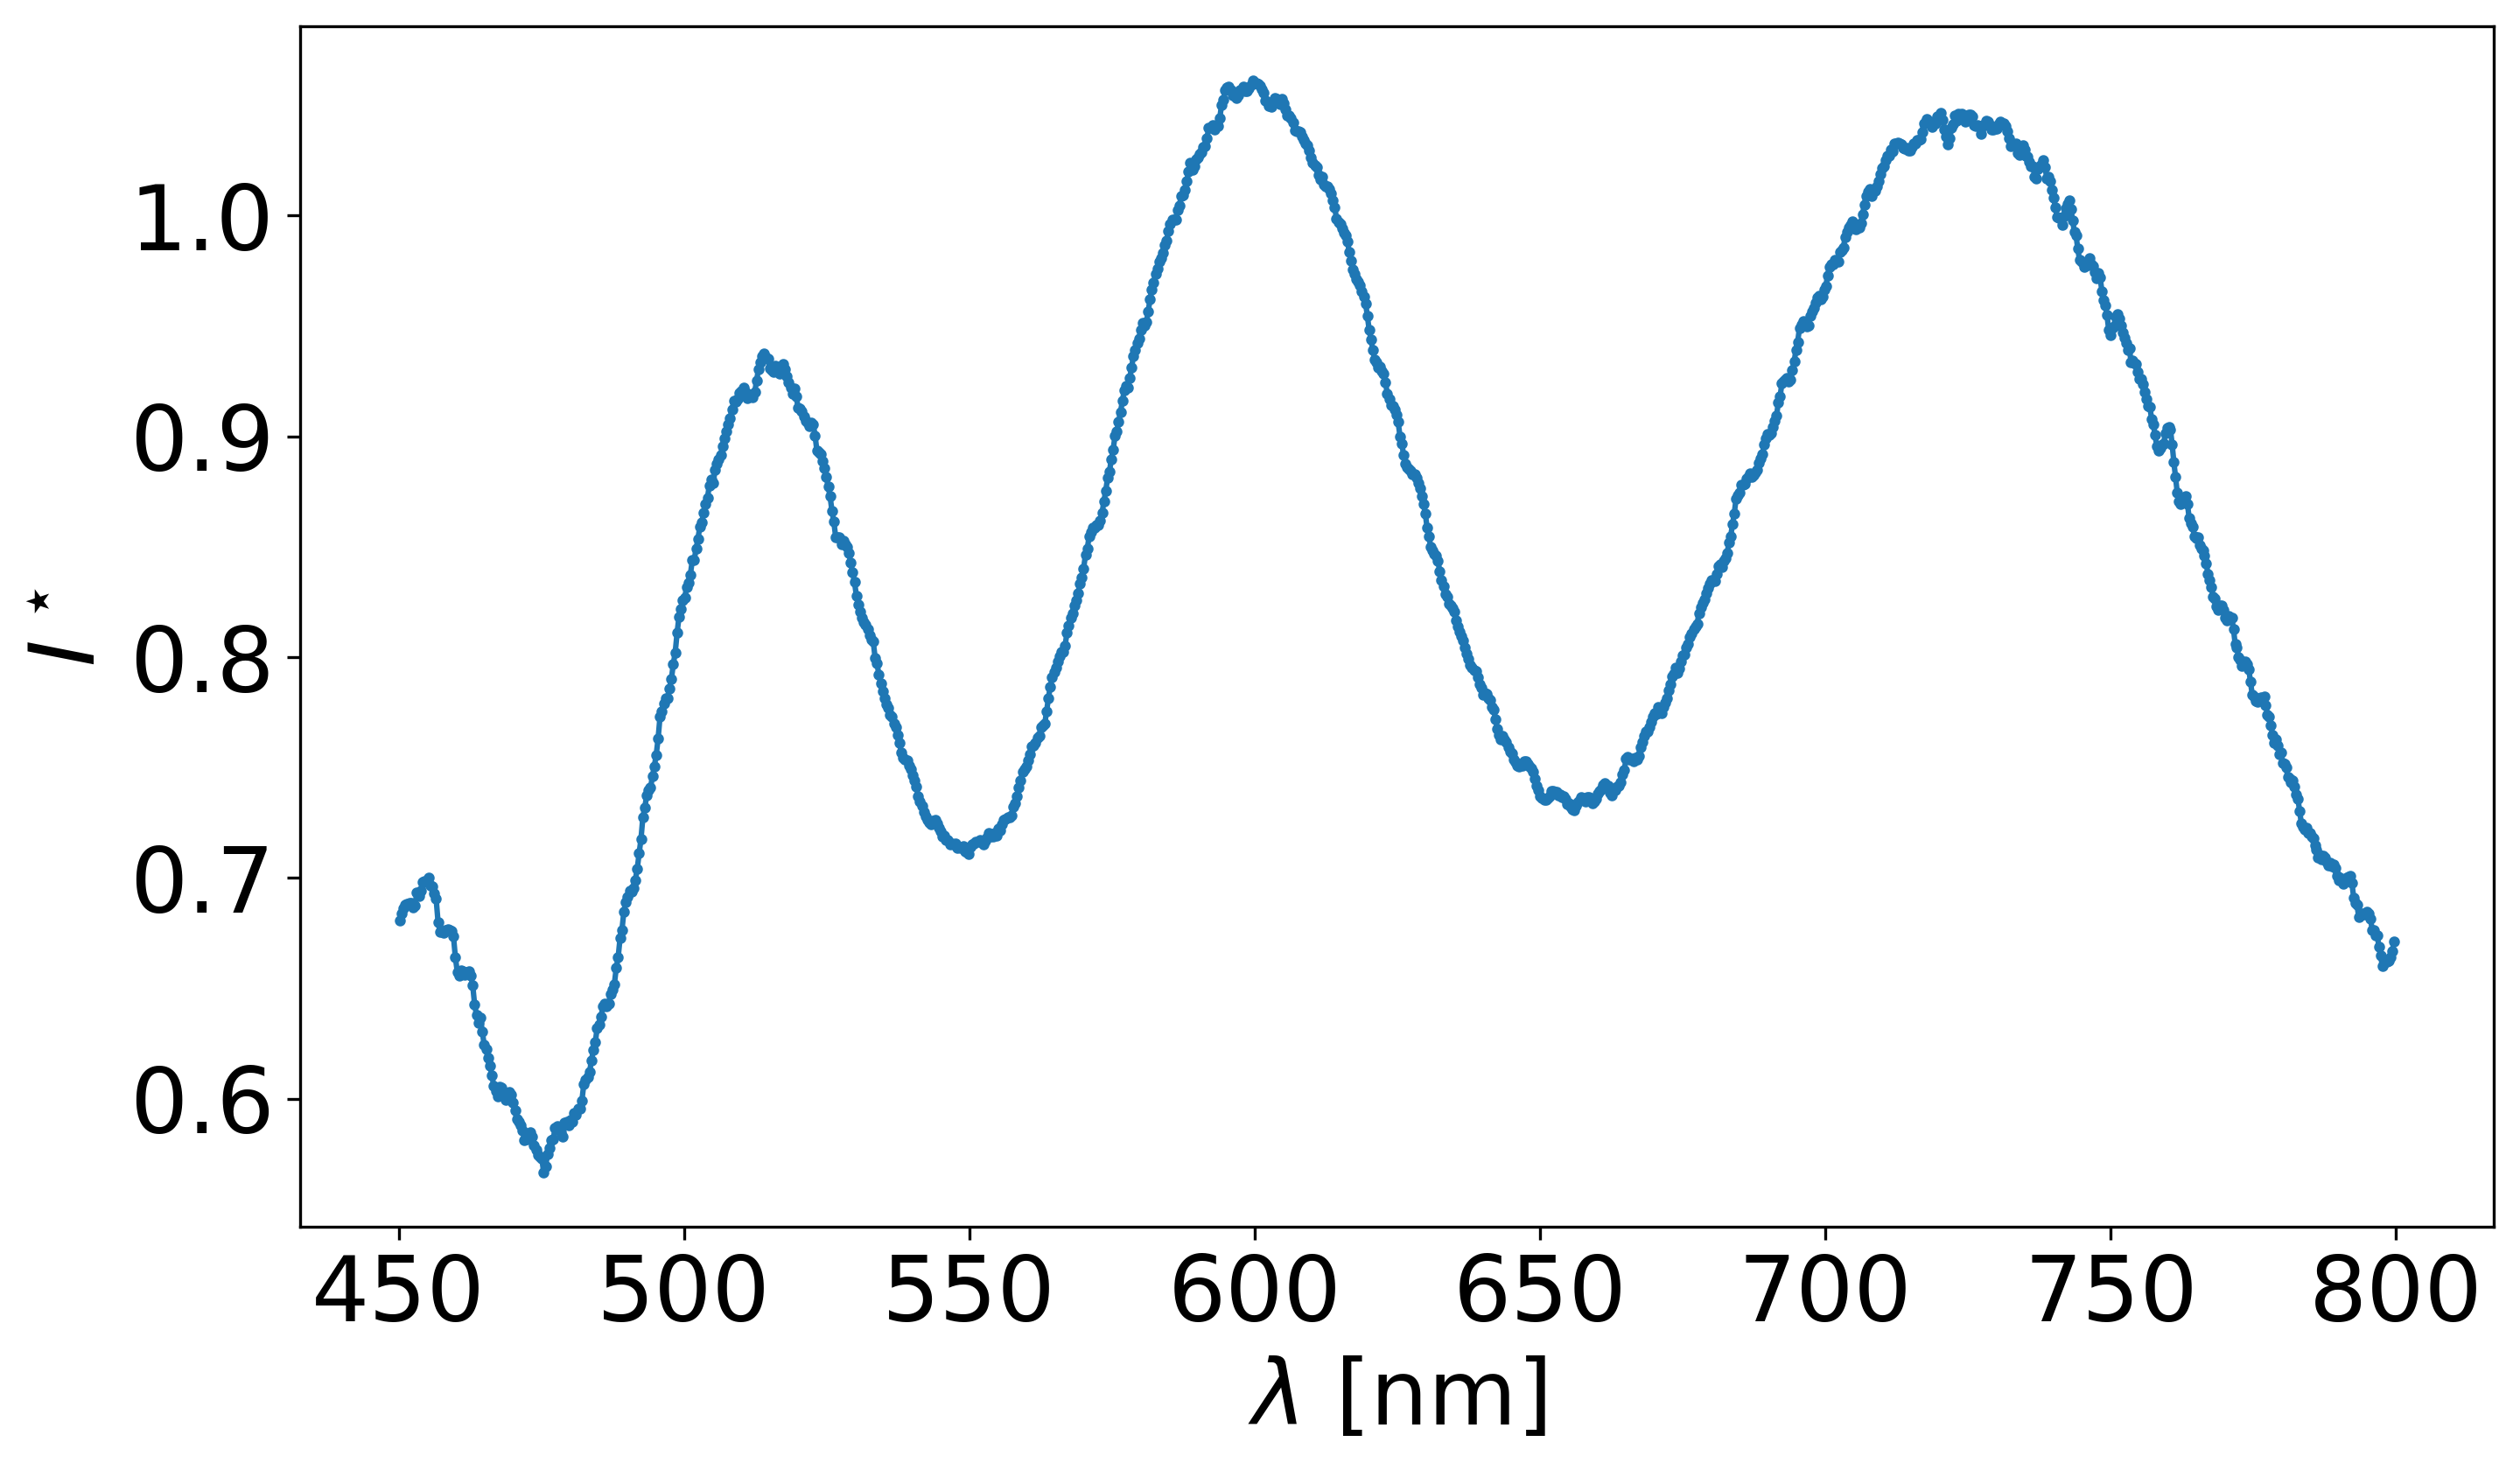

In [3]:
from optifik.analysis import smooth_intensities

# Smoothing the intensity
intensities_smoothed = smooth_intensities(intensities)

# Smoothed intensity as a function of wavelength
plot_spectrum(wavelengths, intensities_smoothed)

## Step 3 : Find peaks

The scipy function `find peaks` is then applied to the smoothed data with the `optifik.analysis` module. Here an exemple of plot you can obtain with the function `finds_peak`.

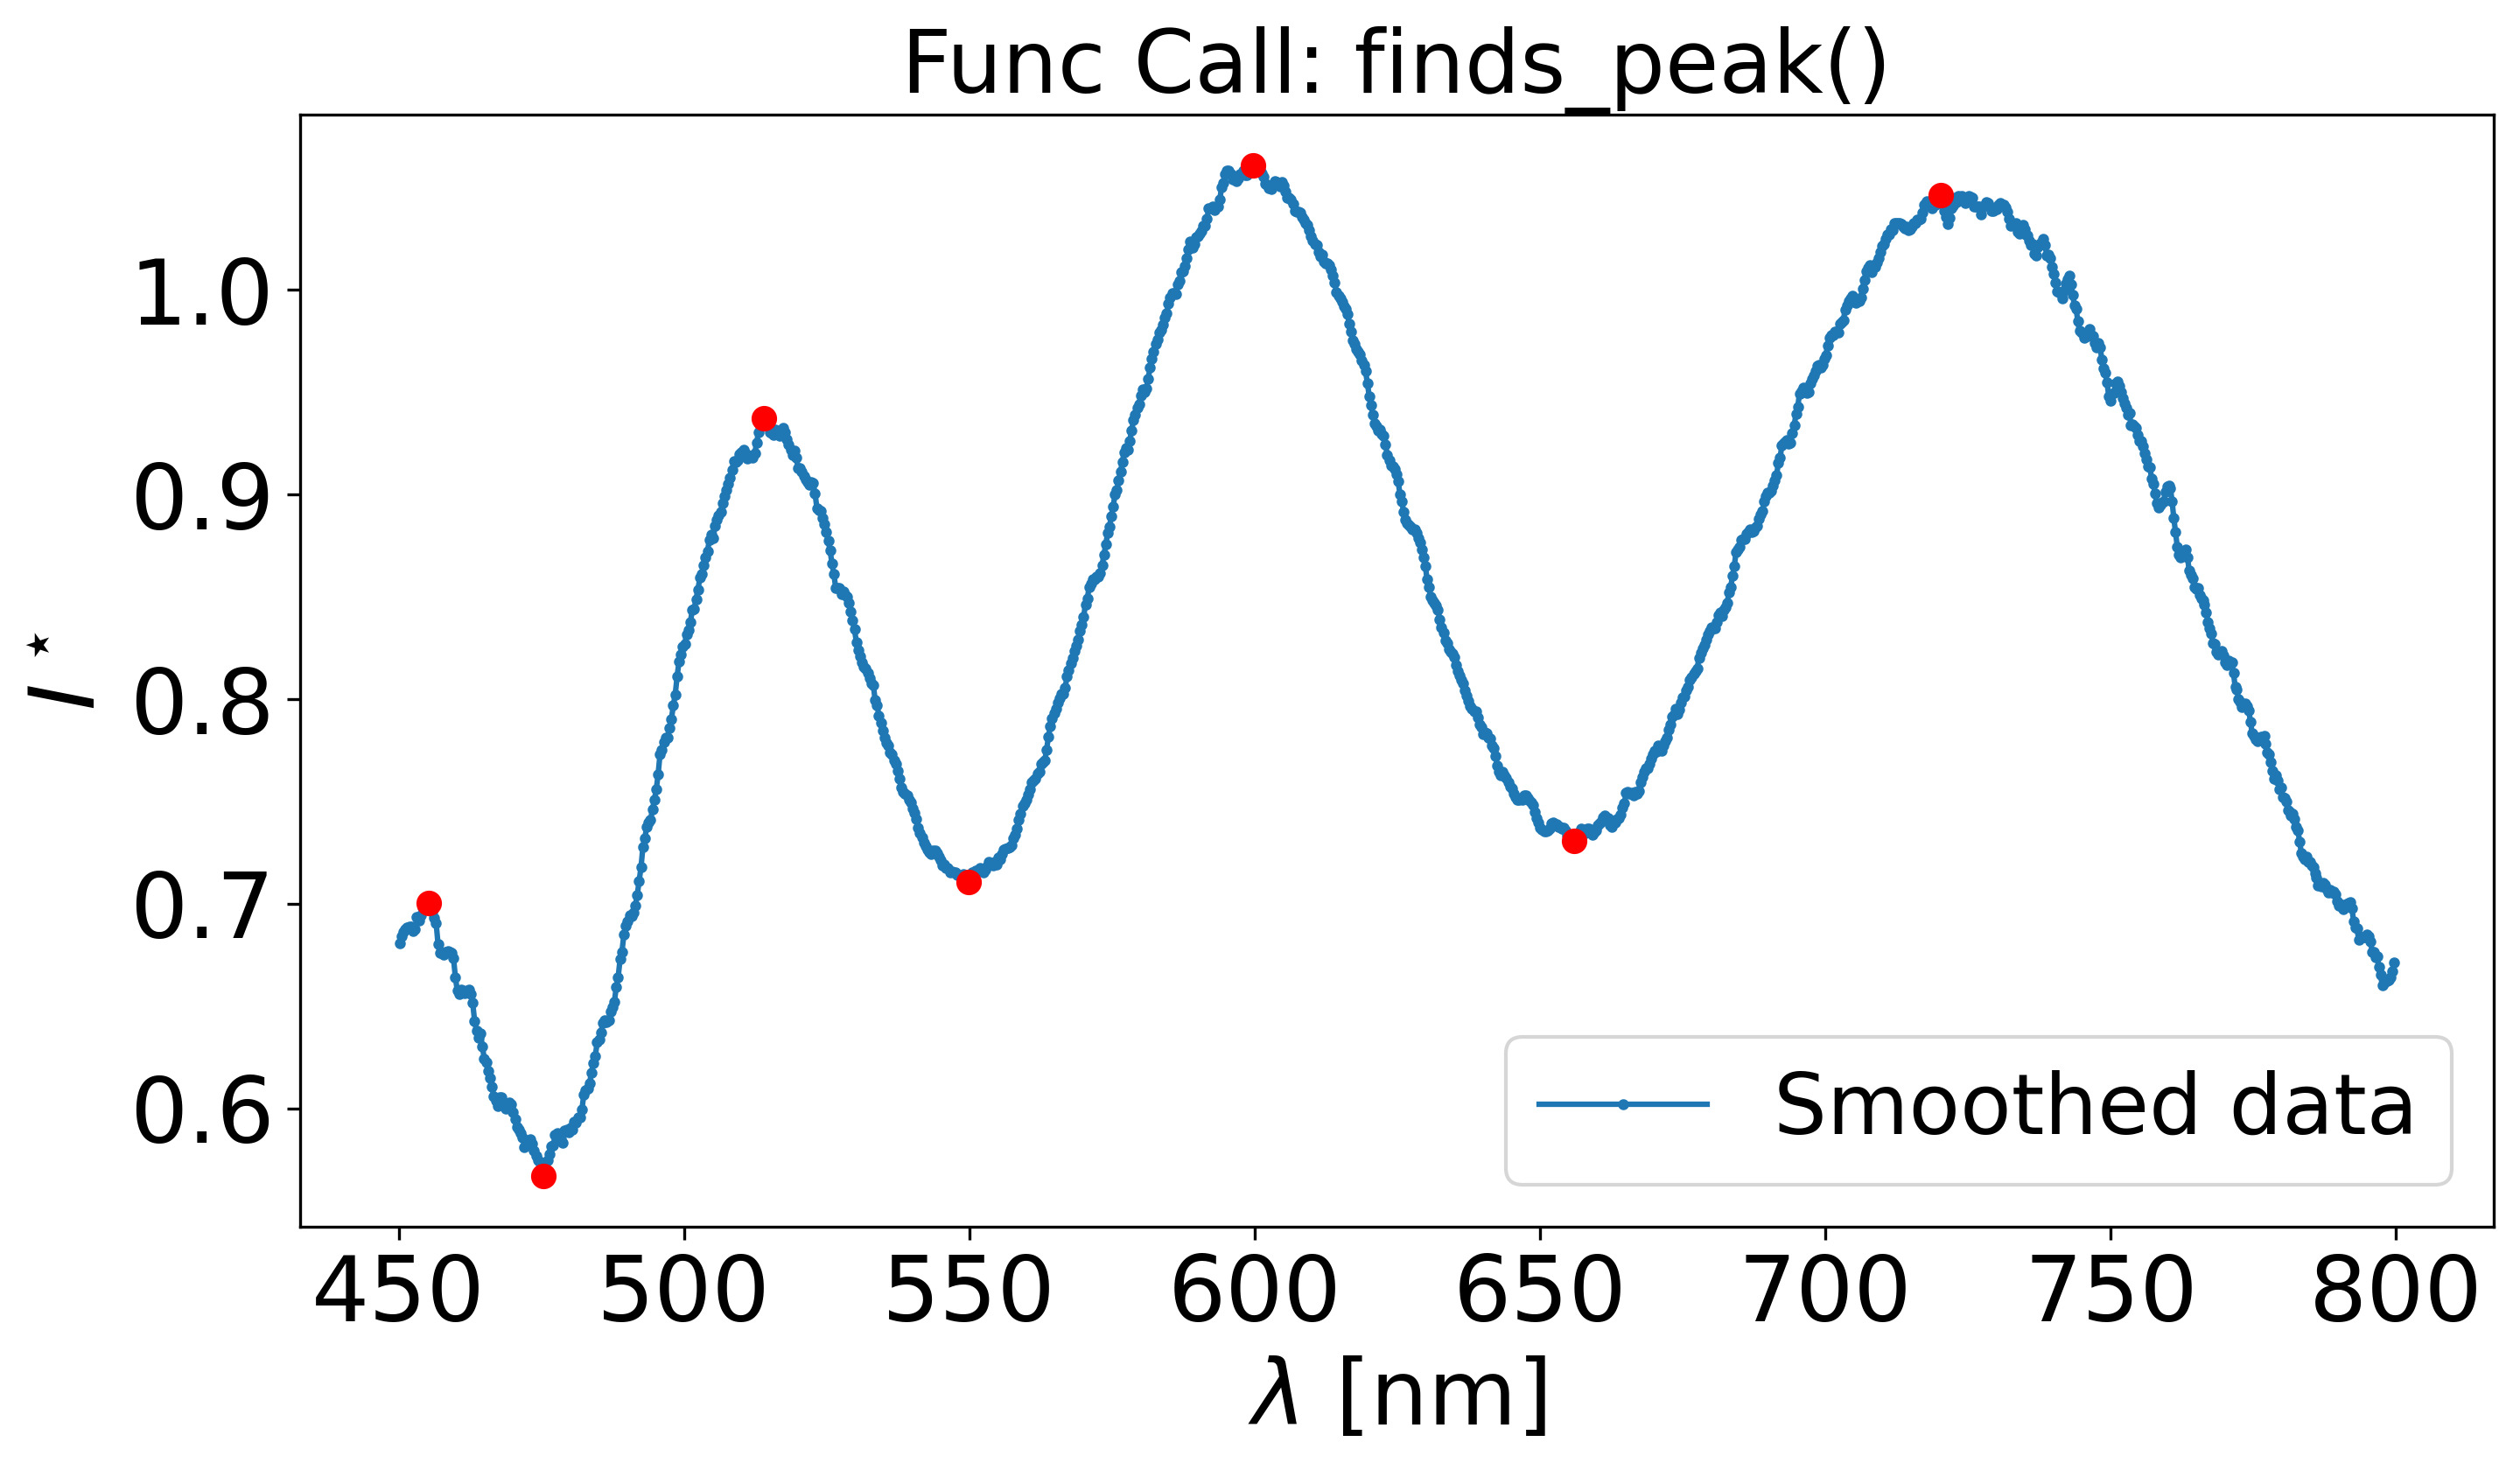

(array([ 75, 300, 632]), array([ 15, 191, 454, 840]))

In [4]:
from optifik.analysis import finds_peak

# Peak detection function, min_peak_prominence and min_peak_distance can be adjusted.
finds_peak(wavelengths, intensities_smoothed, 
           min_peak_prominence=0.018, 
           min_peak_distance=10, 
           plot=True)

The console output shows the wavelength peak indices for both minima and maxima. For this example, 7 peaks have been successfully detected.


In the following, we will distinguish three cases based on the number of peaks detected in the spectrum, each of which will be treated differently. The procedure described above is assumed to have been followed.